# TensorBoard Working Session

In this working session we will take a look at TensorBoard, a visualisation tool for Tensorflow. Tensorflow defines a graph of computations to perform which can be visualised with TensorBoard

First let's look at simple addition

In [1]:
import tensorflow as tf

a = tf.constant(4)
b = tf.constant(5)

x = a + b


with tf.Session() as sess:
    print(sess.run(x))


9


Now repeat but write the graph (computations) to a log file for TensorBoard to read

In [2]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    print(sess.run(x))
writer.close()


9


Should have a file in the directory graphs with a filename of format events.out.tfevents.(id).(hostname)

Launch TensorBoard (Linux and MAC): <br>
$ tensorboard --logdir="./graphs" --port 6006 <br>

Then open your browser and go to: http://localhost:6006/

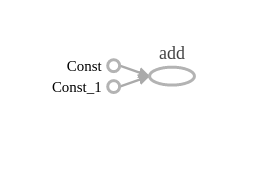

Make the graph more informative by labeling the variables. Can do this using the arguement name=""

In [3]:
a = tf.constant(4, name="a")
b = tf.constant(5, name ="b")

x = a + b


with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    print(sess.run(x))
writer.close()


9


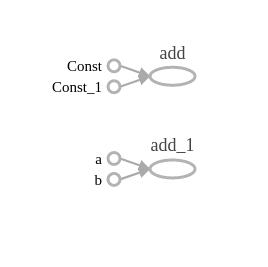

See variables are now labelled. However we still see the previous node whilst one would think it has been overwritten! Can print out the contents of the graph.


In [4]:
with tf.Session() as sess:
    print(sess.graph.as_graph_def())
    

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 4
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 5
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 4
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }

We see a and b are not overwritten. Executing a and b more than once produces duplicate nodes in the graph. Tensorboard shows what nodes are active which I find really useful!

If you reuse variables and operations TensorBoard uses the same original name but appends _x. x starts at 1 and is incremented for each iteration

You can clear all the nodes in the graph with tf.reset_default_graph()

In [5]:
tf.reset_default_graph()

In [6]:
a = tf.constant(4, name="a")
b = tf.constant(5, name ="b")

x = a + b

with tf.Session() as sess:
    print(sess.graph.as_graph_def())
    

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 4
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 5
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
versions {
  producer: 24
}



Just the single additon operation!

The problem with constants

As we've seen constants are stored in the graph definition. This makes loading graphs expensive when constants are large. Best to use variables

Need to initialise tf.Variables first!

In [7]:
tf.reset_default_graph()
h = tf.Variable(4, name="h")
i = tf.Variable(5, name ="i")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    sess.run(init)
    print(sess.run(h+i))
writer.close()

9


## Look at more complex graph

Look at data classification through TensorBoard. Generate two datasets with different means that follow a normal distribution in the x-y plane. Build a classification neural net to distinguish the two. Look at the graph in TensorBoard

(<matplotlib.text.Text at 0x7facf5bfc208>,
 <matplotlib.text.Text at 0x7facf5c0a8d0>)

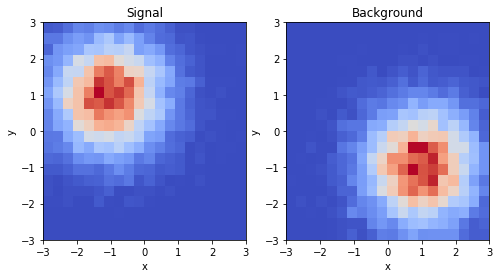

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#First generate the dataset (signal and background training and test sample). 
num_events = 10000

signal_mean = [-1.0, 1.0]
signal_cov = [[1.0, 0.0],
                  [0.0, 1.0]]
signal_train = np.random.multivariate_normal(
    signal_mean, signal_cov, num_events)
signal_val = np.random.multivariate_normal(
    signal_mean, signal_cov, num_events)

background_mean = [1.0, -1.0]
background_cov = [[1.0, 0.0],
                      [0.0, 1.0]]
background_train = np.random.multivariate_normal(
    background_mean, background_cov, num_events)
background_val = np.random.multivariate_normal(
    background_mean, background_cov, num_events)

data_train = np.vstack([signal_train, background_train])
#Want labels to be ints
labels_train = np.vstack([np.ones((num_events, 1), dtype=int), np.zeros((num_events, 1), dtype=int)])

data_val = np.vstack([signal_val, background_val])
#Want labels to be ints
labels_val = np.vstack([np.ones((num_events, 1), dtype=int), np.zeros((num_events, 1), dtype=int)])

range_ = ((-3, 3), (-3, 3))
plt.figure(0, figsize=(8,4))
plt.subplot(1,2,1); plt.title("Signal")
plt.xlabel("x"), plt.ylabel("y")
plt.hist2d(signal_train[:,0], signal_train[:,1], range=range_, bins=20, cmap=cm.coolwarm)
plt.subplot(1,2,2); plt.title("Background")
plt.hist2d(background_train[:,0], background_train[:,1],range=range_, bins=20, cmap=cm.coolwarm)
plt.xlabel("x"), plt.ylabel("y")


Train and test a DNN Classifier 

In [10]:
#Bulid DNN classifier
m , n_inputs = data_train.shape
n_outputs = labels_train.shape[1]
n_hidden1 = 128
n_hidden2 = 32
n_outputs = 2

xy = tf.placeholder(tf.float32, shape=(None, n_inputs), name="XY")
label = tf.placeholder(tf.int64, shape=(None), name="label")

hidden1 = tf.layers.dense(xy, n_hidden1, name="hidden1",
    activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
    activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")


xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, label, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#Function to select batches of data
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(data_train.shape[0], size=batch_size)  # not shown
    X_batch = data_train[indices] # not shown
    y_batch = labels_train.reshape(-1,)[indices]
    return X_batch, y_batch

init = tf.global_variables_initializer()

n_epochs = 20
batch_size = 1000
n_batches = int(np.ceil(m / batch_size))

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

logdir ="./graphs"
loss_summary = tf.summary.scalar('loss', loss)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = loss_summary.eval(feed_dict={xy: X_batch, label: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run([training_op], feed_dict={xy: X_batch, label: y_batch})
        acc_train = accuracy.eval(feed_dict={xy: X_batch, label: y_batch})
        acc_test = accuracy.eval(feed_dict={xy: data_val, label: labels_val.reshape(-1,)})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


file_writer.close()

0 Train accuracy: 0.723 Test accuracy: 0.74125
1 Train accuracy: 0.851 Test accuracy: 0.8589
2 Train accuracy: 0.894 Test accuracy: 0.90445
3 Train accuracy: 0.913 Test accuracy: 0.9108
4 Train accuracy: 0.912 Test accuracy: 0.9133
5 Train accuracy: 0.922 Test accuracy: 0.91495
6 Train accuracy: 0.923 Test accuracy: 0.9156
7 Train accuracy: 0.907 Test accuracy: 0.916
8 Train accuracy: 0.907 Test accuracy: 0.91665
9 Train accuracy: 0.924 Test accuracy: 0.91725
10 Train accuracy: 0.913 Test accuracy: 0.9173
11 Train accuracy: 0.91 Test accuracy: 0.91755
12 Train accuracy: 0.919 Test accuracy: 0.918
13 Train accuracy: 0.925 Test accuracy: 0.91795
14 Train accuracy: 0.923 Test accuracy: 0.9181
15 Train accuracy: 0.913 Test accuracy: 0.91835
16 Train accuracy: 0.91 Test accuracy: 0.9185
17 Train accuracy: 0.919 Test accuracy: 0.91865
18 Train accuracy: 0.922 Test accuracy: 0.91855
19 Train accuracy: 0.921 Test accuracy: 0.91865


Look at TensorBoard. Now have a detailed graph of the classifier

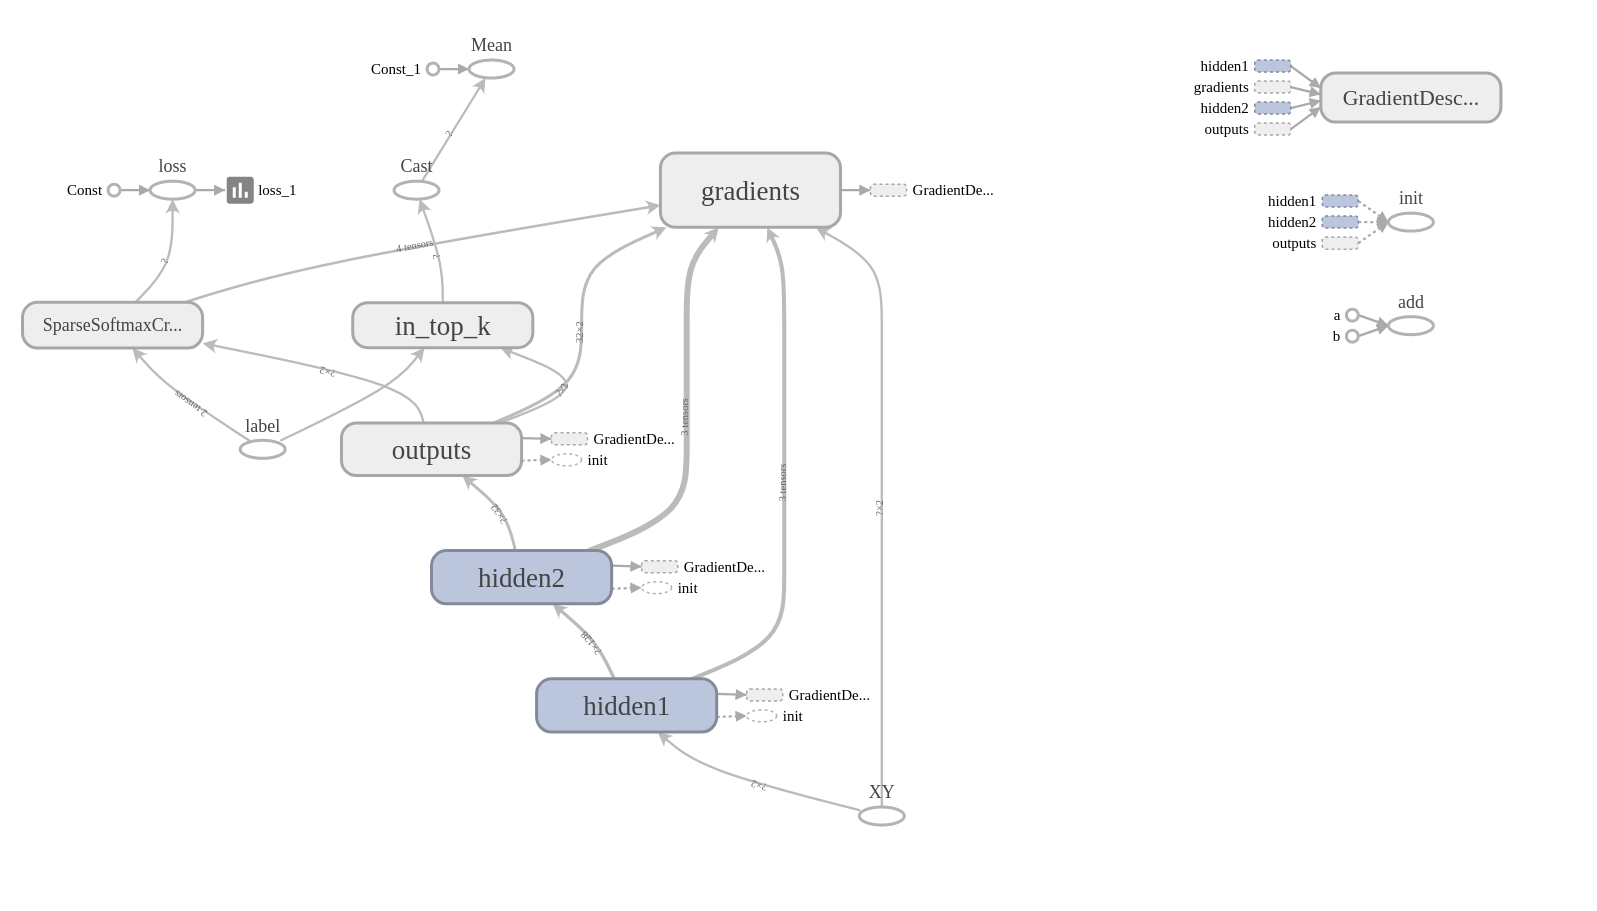

When dealing with more complex models like neural networks the graph can become cluttered. 

You can use name scopes to organise the nodes!

In [12]:
#Reset graph nodes
tf.reset_default_graph()

with tf.name_scope("dnn_vars"):
    xy = tf.placeholder(tf.float32, shape=(None, n_inputs), name="XY")
    label = tf.placeholder(tf.int64, shape=(None), name="label")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(xy, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, label, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
batch_size = 1000
n_batches = int(np.ceil(m / batch_size))

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

loss_summary = tf.summary.scalar('loss', loss)

logdir ="./graphs"
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = loss_summary.eval(feed_dict={xy: X_batch, label: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run([training_op], feed_dict={xy: X_batch, label: y_batch})
        acc_train = accuracy.eval(feed_dict={xy: X_batch, label: y_batch})
        acc_test = accuracy.eval(feed_dict={xy: data_val, label: labels_val.reshape(-1,)})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


file_writer.close()

0 Train accuracy: 0.777 Test accuracy: 0.75205
1 Train accuracy: 0.886 Test accuracy: 0.88815
2 Train accuracy: 0.891 Test accuracy: 0.909
3 Train accuracy: 0.917 Test accuracy: 0.9132
4 Train accuracy: 0.916 Test accuracy: 0.91455
5 Train accuracy: 0.914 Test accuracy: 0.9161
6 Train accuracy: 0.925 Test accuracy: 0.9166
7 Train accuracy: 0.91 Test accuracy: 0.91675
8 Train accuracy: 0.907 Test accuracy: 0.91695
9 Train accuracy: 0.927 Test accuracy: 0.91785
10 Train accuracy: 0.916 Test accuracy: 0.91805
11 Train accuracy: 0.916 Test accuracy: 0.9182
12 Train accuracy: 0.918 Test accuracy: 0.91805
13 Train accuracy: 0.924 Test accuracy: 0.9181
14 Train accuracy: 0.924 Test accuracy: 0.918
15 Train accuracy: 0.918 Test accuracy: 0.91795
16 Train accuracy: 0.913 Test accuracy: 0.9178
17 Train accuracy: 0.919 Test accuracy: 0.91765
18 Train accuracy: 0.92 Test accuracy: 0.91775
19 Train accuracy: 0.923 Test accuracy: 0.9178


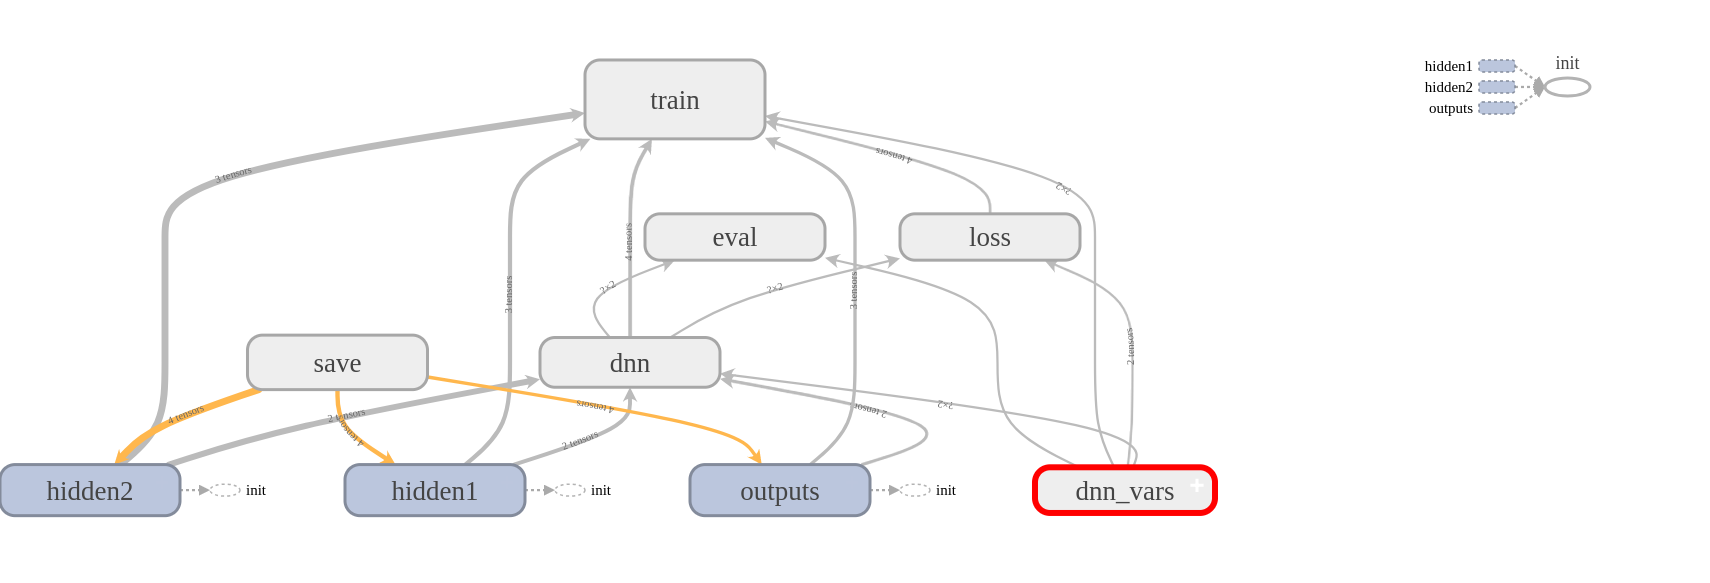

Graph is much cleaner using named scopes. Can click on box of interest to expand!

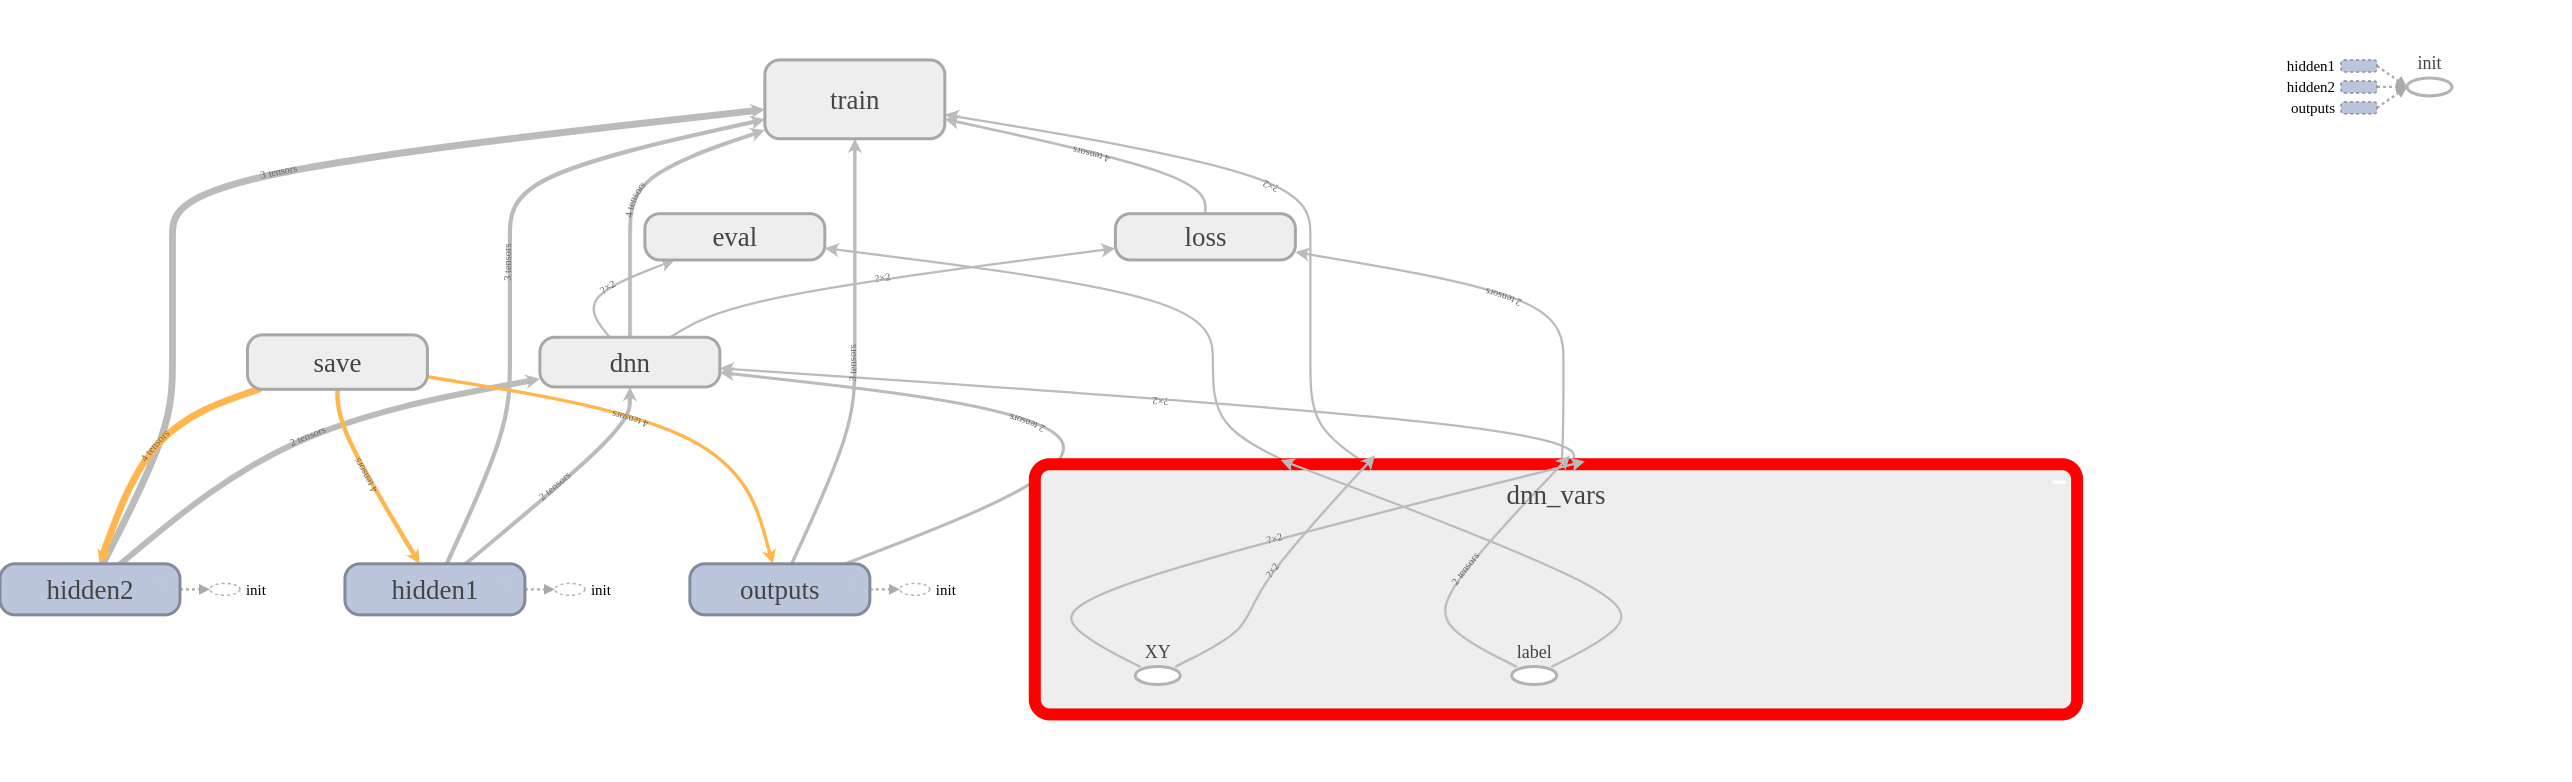

TensorBoard accumulates all the graphs in a directory. So you must write graphs distinct projects to separate directories.  For example replace

In [13]:
logdir ="./graphs"
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

with something like

In [14]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "graphs"
logdir = "{}/run-{}/".format(root_logdir, now)